### 2015-2025 (10년 실거래가)

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

db_path = 'database.db'
conn = sqlite3.connect(db_path)

# 데이터 조회 예시
query = "SELECT * FROM REAL_ESTATE_TRANSACTION;"
df = pd.read_sql(query, conn)

In [2]:
# 계약년,월,일 구분
df['계약일'] = pd.to_datetime(df['계약일'], format='%Y%m%d', errors='coerce')
df['계약년도'] = df['계약일'].dt.year
df['계약월'] = df['계약일'].dt.month
df['계약일'] = df['계약일'].dt.day

In [3]:
df.columns

Index(['접수연도', '자치구코드', '자치구명', '법정동코드', '법정동명', '지번구분', '지번구분명', '본번', '부번',
       '건물명', '계약일', '물건금액(만원)', '건물면적(㎡)', '토지면적(㎡)', '층', '권리구분', '취소일',
       '건축년도', '건물용도', '신고구분', '신고한 개업공인중개사 시군구명', '계약년도', '계약월'],
      dtype='object')

In [4]:
df[['접수연도', '계약년도']]

,접수연도,계약년도
0,2025,2025
1,2025,2025
2,2025,2025
3,2025,2025
4,2025,2025
...,...,...
1371154,2015,2012
1371155,2015,2012
1371156,2015,2012
1371157,2015,2012


In [5]:
cond1 = df['자치구명'] == '광진구'
# cond2 = df['건물용도'] == '아파트'
df_gangnam = df[cond1]
temp = df_gangnam.groupby(['계약년도','건물용도', '자치구명'])['물건금액(만원)'].mean().to_frame()

In [11]:
temp = temp.reset_index()

In [12]:
temp.head()

,계약년도,건물용도,자치구명,물건금액(만원)
0,2013,아파트,광진구,39400.000000
1,2014,단독다가구,광진구,89173.782609
2,2014,아파트,광진구,56139.144928
3,2014,연립다세대,광진구,25346.666667
4,2014,오피스텔,광진구,19041.666667


In [27]:
temp_A = temp[temp['건물용도'] == '아파트']
temp_B = temp[temp['건물용도'] == '단독다가구']
temp_C = temp[temp['건물용도'] == '연립다세대']
temp_D = temp[temp['건물용도'] == '오피스텔']

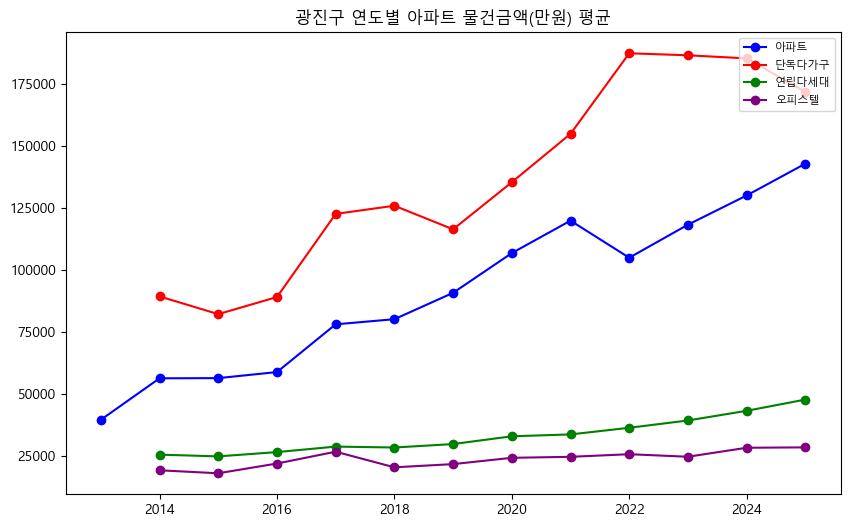

In [30]:
plt.rc("font", family="Malgun Gothic")

plt.figure(figsize=(10, 6))

plt.plot(temp_A['계약년도'].to_list(), temp_A['물건금액(만원)'].to_list(), marker='o', color='blue', label='아파트')
plt.plot(temp_B['계약년도'].to_list(), temp_B['물건금액(만원)'].to_list(), marker='o', color='red', label='단독다가구')
plt.plot(temp_C['계약년도'].to_list(), temp_C['물건금액(만원)'].to_list(), marker='o', color='green', label='연립다세대')
plt.plot(temp_D['계약년도'].to_list(), temp_D['물건금액(만원)'].to_list(), marker='o', color='purple', label='오피스텔')

plt.title('광진구 연도별 아파트 물건금액(만원) 평균')
plt.legend(loc='upper right', fontsize=8)
plt.show()

In [28]:
df['자치구명'].unique()

array(['강서구', '광진구', '금천구', '영등포구', '강남구', '강동구', '은평구', '마포구', '강북구',
       '송파구', '중구', '노원구', '관악구', '동작구', '동대문구', '도봉구', '구로구', '중랑구',
       '종로구', '성동구', '성북구', '양천구', '서대문구', '서초구', '용산구', None],
      dtype=object)

In [3]:
df['계약일']

0         20250922
1         20250922
2         20250922
3         20250922
4         20250922
            ...   
651263    20150303
651264    20140419
651265    20121220
651266    20110715
651267    20100204
Name: 계약일, Length: 651268, dtype: int64